<a href="https://colab.research.google.com/github/shalabh147/DCGan-Keras/blob/master/dcgan_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
#!pip install tf-nightly
import tensorflow as tf
#from tensorflow import keras
#import keras
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
print('Tensorflow version:', tf.__version__)

Tensorflow version: 2.2.0


In [ ]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255,featurewise_center=True,featurewise_std_normalization=True)
train_generator = train_datagen.flow_from_directory(
        '../input/celeba-dataset/img_align_celeba',
        target_size=(64, 64),
        batch_size=64,
        class_mode=None)

Found 202599 images belonging to 1 classes.


In [ ]:
print(train_generator[0].shape)

(64, 64, 64, 3)


/opt/conda/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/opt/conda/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


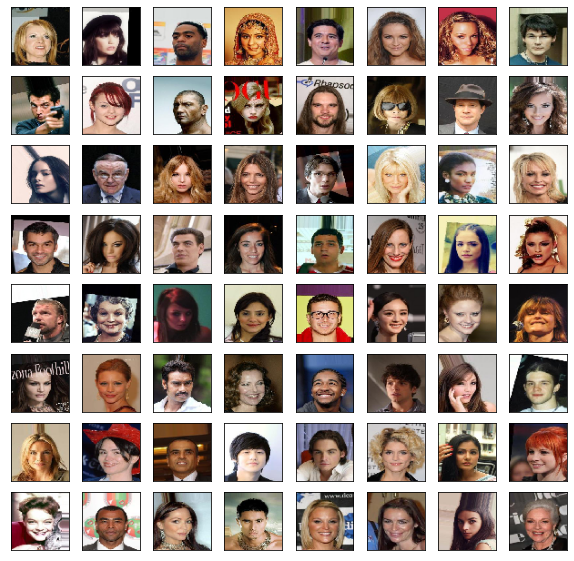

In [ ]:
plt.figure(figsize=(10,10))
for i in range(64):
    plt.subplot(8,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_generator[0][i])
plt.show()

In [ ]:
num_features = 100
ngf = 64
initializer1 = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02)
initializer2 = tf.keras.initializers.RandomNormal(mean=1.0, stddev=0.02)

generator = tf.keras.models.Sequential([
    tf.keras.layers.Conv2DTranspose(ngf*8,(4,4),strides = (1,1) , padding = 'valid',kernel_initializer=initializer1),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    #tf.keras.layers.Dense(4*4*ngf*8, input_shape=[num_features]),
    #tf.keras.layers.Reshape([4, 4, 512]),
    #tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2DTranspose(ngf*4,(4,4),strides = (2,2) , padding = 'same',activation = "relu",kernel_initializer=initializer1),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2DTranspose(ngf*2,(4,4),strides = (2,2) , padding = 'same',activation = "relu",kernel_initializer=initializer1),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2DTranspose(ngf,(4,4),strides = (2,2) , padding = 'same',activation = "relu",kernel_initializer=initializer1),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2DTranspose(3,(4,4) , strides = (2,2) , padding = 'same',activation = "tanh",kernel_initializer=initializer1),
])

[[[[-1.68263738e+00  7.12909971e-01  3.28763612e-01  5.97390922e-03
     1.47812929e+00 -3.12022730e-01  5.62519354e-02 -2.02974468e+00
    -1.13508120e+00 -8.46690988e-01 -3.03793959e-01 -5.43050774e-01
    -1.23011849e-01  2.15604052e-01 -5.16416429e-01 -1.20235035e-02
     4.46131010e-01  7.45521680e-03  4.04309312e-01 -3.93469890e-01
    -9.89962817e-01  3.84483794e-01 -4.10305618e-01  4.19364364e-01
    -5.65956414e-01  1.32728717e+00 -1.35103790e+00 -2.40415005e-01
    -4.91894724e-01 -6.41634358e-01  8.81185701e-01 -2.29155681e-01
    -1.64055893e-03 -2.11742517e-01  3.80148321e-01  8.76029689e-01
     6.61943083e-01 -2.73868805e-01 -1.18570861e+00  1.97467756e+00
    -2.95431797e-01  7.69646703e-01 -1.66671354e+00  6.82816339e-02
     1.27016262e+00 -7.42217823e-01  2.64957084e-01  4.98482936e-02
    -1.09439642e+00 -8.01358141e-01 -1.39428703e+00 -1.24862681e-01
     3.41203173e-01  1.88644817e-01 -4.28486469e-01 -4.35116227e-01
    -1.08087878e+00 -9.13508163e-01  1.00330185e

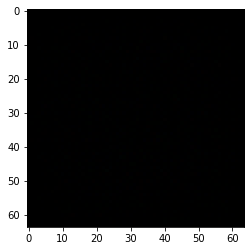

In [ ]:
noise = np.random.normal(size=(1,1,1,num_features))
print(noise)
generated_images = generator(noise)
print(generated_images[0])
print(generated_images.shape)
plt.plot()
plt.imshow(generated_images[0])
plt.show()

In [ ]:
discriminator = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (4,4), (2,2), padding="same", input_shape=[64, 64, 3],kernel_initializer=initializer1),
    tf.keras.layers.LeakyReLU(0.2),
    tf.keras.layers.Conv2D(128, (4,4), (2,2), padding="same",kernel_initializer=initializer1),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.LeakyReLU(0.2),
    tf.keras.layers.Conv2D(256, (4,4) , (2,2) , padding = "same",kernel_initializer=initializer1),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.LeakyReLU(0.2),
    tf.keras.layers.Conv2D(512, (4,4) , (2,2) , padding = "same",kernel_initializer=initializer1),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.LeakyReLU(0.2),
    tf.keras.layers.Conv2D(1,(4,4),(1,1), padding = 'valid' , activation = 'sigmoid',kernel_initializer=initializer1),
    tf.keras.layers.Flatten(),
    #tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
decision = discriminator(generated_images)
print(decision)

tf.Tensor([[0.499992]], shape=(1, 1), dtype=float32)


In [ ]:
from tensorflow.keras.optimizers import Adam
opt = Adam(lr=0.0002)
discriminator.compile(loss="binary_crossentropy", optimizer=opt)
discriminator.trainable = False
gan = tf.keras.models.Sequential([generator, discriminator])
gan.compile(loss="binary_crossentropy", optimizer=opt)

In [ ]:
#from IPython import display
#from tqdm import tqdm
seed = tf.random.normal(shape=[64,1,1,100])
batch_size = 64

In [ ]:
generator, discriminator = gan.layers
epochs = 5
for epoch in range(epochs):
    print("Epoch {}/{}".format(epoch + 1, epochs))
    cnt = 0
    print(len(train_generator))
    
    for i in range(len(train_generator)):
        X = train_generator[i]
        print(X.shape)
        
        print(i)
        noise = tf.random.normal(shape=[batch_size,1,1,num_features])
        fake_images = generator(noise)
        X_fr = tf.concat([X,fake_images], axis=0)
        y1 = tf.constant([[1.]] * batch_size + [[0.]] * batch_size)
        discriminator.trainable = True
        #print(len(X_fr))
        if(len(X_fr) != len(y1)):
            continue
            
        discriminator.train_on_batch(X_fr, y1)
        noise = tf.random.normal(shape=[batch_size,1,1,num_features])
        y2 = tf.constant([[1.]] * batch_size)
        discriminator.trainable = False
        gan.train_on_batch(noise, y2)

Epoch 1/5
3166
(64, 64, 64, 3)
0
(64, 64, 64, 3)
1
(64, 64, 64, 3)
2
(64, 64, 64, 3)
3
(64, 64, 64, 3)
4
(64, 64, 64, 3)
5
(64, 64, 64, 3)
6
(64, 64, 64, 3)
7
(64, 64, 64, 3)
8
(64, 64, 64, 3)
9
(64, 64, 64, 3)
10
(64, 64, 64, 3)
11
(64, 64, 64, 3)
12
(64, 64, 64, 3)
13
(64, 64, 64, 3)
14
(64, 64, 64, 3)
15
(64, 64, 64, 3)
16
(64, 64, 64, 3)
17
(64, 64, 64, 3)
18
(64, 64, 64, 3)
19
(64, 64, 64, 3)
20
(64, 64, 64, 3)
21
(64, 64, 64, 3)
22
(64, 64, 64, 3)
23
(64, 64, 64, 3)
24
(64, 64, 64, 3)
25
(64, 64, 64, 3)
26
(64, 64, 64, 3)
27
(64, 64, 64, 3)
28
(64, 64, 64, 3)
29
(64, 64, 64, 3)
30
(64, 64, 64, 3)
31
(64, 64, 64, 3)
32
(64, 64, 64, 3)
33
(64, 64, 64, 3)
34
(64, 64, 64, 3)
35
(64, 64, 64, 3)
36
(64, 64, 64, 3)
37
(64, 64, 64, 3)
38
(64, 64, 64, 3)
39
(64, 64, 64, 3)
40
(64, 64, 64, 3)
41
(64, 64, 64, 3)
42
(64, 64, 64, 3)
43
(64, 64, 64, 3)
44
(64, 64, 64, 3)
45
(64, 64, 64, 3)
46
(64, 64, 64, 3)
47
(64, 64, 64, 3)
48
(64, 64, 64, 3)
49
(64, 64, 64, 3)
50
(64, 64, 64, 3)
51
(64, 64

(64, 64, 64, 3)
415
(64, 64, 64, 3)
416
(64, 64, 64, 3)
417
(64, 64, 64, 3)
418
(64, 64, 64, 3)
419
(64, 64, 64, 3)
420
(64, 64, 64, 3)
421
(64, 64, 64, 3)
422
(64, 64, 64, 3)
423
(64, 64, 64, 3)
424
(64, 64, 64, 3)
425
(64, 64, 64, 3)
426
(64, 64, 64, 3)
427
(64, 64, 64, 3)
428
(64, 64, 64, 3)
429
(64, 64, 64, 3)
430
(64, 64, 64, 3)
431
(64, 64, 64, 3)
432
(64, 64, 64, 3)
433
(64, 64, 64, 3)
434
(64, 64, 64, 3)
435
(64, 64, 64, 3)
436
(64, 64, 64, 3)
437
(64, 64, 64, 3)
438
(64, 64, 64, 3)
439
(64, 64, 64, 3)
440
(64, 64, 64, 3)
441
(64, 64, 64, 3)
442
(64, 64, 64, 3)
443
(64, 64, 64, 3)
444
(64, 64, 64, 3)
445
(64, 64, 64, 3)
446
(64, 64, 64, 3)
447
(64, 64, 64, 3)
448
(64, 64, 64, 3)
449
(64, 64, 64, 3)
450
(64, 64, 64, 3)
451
(64, 64, 64, 3)
452
(64, 64, 64, 3)
453
(64, 64, 64, 3)
454
(64, 64, 64, 3)
455
(64, 64, 64, 3)
456
(64, 64, 64, 3)
457
(64, 64, 64, 3)
458
(64, 64, 64, 3)
459
(64, 64, 64, 3)
460
(64, 64, 64, 3)
461
(64, 64, 64, 3)
462
(64, 64, 64, 3)
463
(64, 64, 64, 3)
464


(64, 64, 64, 3)
825
(64, 64, 64, 3)
826
(64, 64, 64, 3)
827
(64, 64, 64, 3)
828
(64, 64, 64, 3)
829
(64, 64, 64, 3)
830
(64, 64, 64, 3)
831
(64, 64, 64, 3)
832
(64, 64, 64, 3)
833
(64, 64, 64, 3)
834
(64, 64, 64, 3)
835
(64, 64, 64, 3)
836
(64, 64, 64, 3)
837
(64, 64, 64, 3)
838
(64, 64, 64, 3)
839
(64, 64, 64, 3)
840
(64, 64, 64, 3)
841
(64, 64, 64, 3)
842
(64, 64, 64, 3)
843
(64, 64, 64, 3)
844
(64, 64, 64, 3)
845
(64, 64, 64, 3)
846
(64, 64, 64, 3)
847
(64, 64, 64, 3)
848
(64, 64, 64, 3)
849
(64, 64, 64, 3)
850
(64, 64, 64, 3)
851
(64, 64, 64, 3)
852
(64, 64, 64, 3)
853
(64, 64, 64, 3)
854
(64, 64, 64, 3)
855
(64, 64, 64, 3)
856
(64, 64, 64, 3)
857
(64, 64, 64, 3)
858
(64, 64, 64, 3)
859
(64, 64, 64, 3)
860
(64, 64, 64, 3)
861
(64, 64, 64, 3)
862
(64, 64, 64, 3)
863
(64, 64, 64, 3)
864
(64, 64, 64, 3)
865
(64, 64, 64, 3)
866
(64, 64, 64, 3)
867
(64, 64, 64, 3)
868
(64, 64, 64, 3)
869
(64, 64, 64, 3)
870
(64, 64, 64, 3)
871
(64, 64, 64, 3)
872
(64, 64, 64, 3)
873
(64, 64, 64, 3)
874


(64, 64, 64, 3)
1224
(64, 64, 64, 3)
1225
(64, 64, 64, 3)
1226
(64, 64, 64, 3)
1227
(64, 64, 64, 3)
1228
(64, 64, 64, 3)
1229
(64, 64, 64, 3)
1230
(64, 64, 64, 3)
1231
(64, 64, 64, 3)
1232
(64, 64, 64, 3)
1233
(64, 64, 64, 3)
1234
(64, 64, 64, 3)
1235
(64, 64, 64, 3)
1236
(64, 64, 64, 3)
1237
(64, 64, 64, 3)
1238
(64, 64, 64, 3)
1239
(64, 64, 64, 3)
1240
(64, 64, 64, 3)
1241
(64, 64, 64, 3)
1242
(64, 64, 64, 3)
1243
(64, 64, 64, 3)
1244
(64, 64, 64, 3)
1245
(64, 64, 64, 3)
1246
(64, 64, 64, 3)
1247
(64, 64, 64, 3)
1248
(64, 64, 64, 3)
1249
(64, 64, 64, 3)
1250
(64, 64, 64, 3)
1251
(64, 64, 64, 3)
1252
(64, 64, 64, 3)
1253
(64, 64, 64, 3)
1254
(64, 64, 64, 3)
1255
(64, 64, 64, 3)
1256
(64, 64, 64, 3)
1257
(64, 64, 64, 3)
1258
(64, 64, 64, 3)
1259
(64, 64, 64, 3)
1260
(64, 64, 64, 3)
1261
(64, 64, 64, 3)
1262
(64, 64, 64, 3)
1263
(64, 64, 64, 3)
1264
(64, 64, 64, 3)
1265
(64, 64, 64, 3)
1266
(64, 64, 64, 3)
1267
(64, 64, 64, 3)
1268
(64, 64, 64, 3)
1269
(64, 64, 64, 3)
1270
(64, 64, 64, 

(64, 64, 64, 3)
1615
(64, 64, 64, 3)
1616
(64, 64, 64, 3)
1617
(64, 64, 64, 3)
1618
(64, 64, 64, 3)
1619
(64, 64, 64, 3)
1620
(64, 64, 64, 3)
1621
(64, 64, 64, 3)
1622
(64, 64, 64, 3)
1623
(64, 64, 64, 3)
1624
(64, 64, 64, 3)
1625
(64, 64, 64, 3)
1626
(64, 64, 64, 3)
1627
(64, 64, 64, 3)
1628
(64, 64, 64, 3)
1629
(64, 64, 64, 3)
1630
(64, 64, 64, 3)
1631
(64, 64, 64, 3)
1632
(64, 64, 64, 3)
1633
(64, 64, 64, 3)
1634
(64, 64, 64, 3)
1635
(64, 64, 64, 3)
1636
(64, 64, 64, 3)
1637
(64, 64, 64, 3)
1638
(64, 64, 64, 3)
1639
(64, 64, 64, 3)
1640
(64, 64, 64, 3)
1641
(64, 64, 64, 3)
1642
(64, 64, 64, 3)
1643
(64, 64, 64, 3)
1644
(64, 64, 64, 3)
1645
(64, 64, 64, 3)
1646
(64, 64, 64, 3)
1647
(64, 64, 64, 3)
1648
(64, 64, 64, 3)
1649
(64, 64, 64, 3)
1650
(64, 64, 64, 3)
1651
(64, 64, 64, 3)
1652
(64, 64, 64, 3)
1653
(64, 64, 64, 3)
1654
(64, 64, 64, 3)
1655
(64, 64, 64, 3)
1656
(64, 64, 64, 3)
1657
(64, 64, 64, 3)
1658
(64, 64, 64, 3)
1659
(64, 64, 64, 3)
1660
(64, 64, 64, 3)
1661
(64, 64, 64, 

(64, 64, 64, 3)
2006
(64, 64, 64, 3)
2007
(64, 64, 64, 3)
2008
(64, 64, 64, 3)
2009
(64, 64, 64, 3)
2010
(64, 64, 64, 3)
2011
(64, 64, 64, 3)
2012
(64, 64, 64, 3)
2013
(64, 64, 64, 3)
2014
(64, 64, 64, 3)
2015
(64, 64, 64, 3)
2016
(64, 64, 64, 3)
2017
(64, 64, 64, 3)
2018
(64, 64, 64, 3)
2019
(64, 64, 64, 3)
2020
(64, 64, 64, 3)
2021
(64, 64, 64, 3)
2022
(64, 64, 64, 3)
2023
(64, 64, 64, 3)
2024
(64, 64, 64, 3)
2025
(64, 64, 64, 3)
2026
(64, 64, 64, 3)
2027
(64, 64, 64, 3)
2028
(64, 64, 64, 3)
2029
(64, 64, 64, 3)
2030
(64, 64, 64, 3)
2031
(64, 64, 64, 3)
2032
(64, 64, 64, 3)
2033
(64, 64, 64, 3)
2034
(64, 64, 64, 3)
2035
(64, 64, 64, 3)
2036
(64, 64, 64, 3)
2037
(64, 64, 64, 3)
2038
(64, 64, 64, 3)
2039
(64, 64, 64, 3)
2040
(64, 64, 64, 3)
2041
(64, 64, 64, 3)
2042
(64, 64, 64, 3)
2043
(64, 64, 64, 3)
2044
(64, 64, 64, 3)
2045
(64, 64, 64, 3)
2046
(64, 64, 64, 3)
2047
(64, 64, 64, 3)
2048
(64, 64, 64, 3)
2049
(64, 64, 64, 3)
2050
(64, 64, 64, 3)
2051
(64, 64, 64, 3)
2052
(64, 64, 64, 

(64, 64, 64, 3)
2397
(64, 64, 64, 3)
2398
(64, 64, 64, 3)
2399
(64, 64, 64, 3)
2400
(64, 64, 64, 3)
2401
(64, 64, 64, 3)
2402
(64, 64, 64, 3)
2403
(64, 64, 64, 3)
2404
(64, 64, 64, 3)
2405
(64, 64, 64, 3)
2406
(64, 64, 64, 3)
2407
(64, 64, 64, 3)
2408
(64, 64, 64, 3)
2409
(64, 64, 64, 3)
2410
(64, 64, 64, 3)
2411
(64, 64, 64, 3)
2412
(64, 64, 64, 3)
2413
(64, 64, 64, 3)
2414
(64, 64, 64, 3)
2415
(64, 64, 64, 3)
2416
(64, 64, 64, 3)
2417
(64, 64, 64, 3)
2418
(64, 64, 64, 3)
2419
(64, 64, 64, 3)
2420
(64, 64, 64, 3)
2421
(64, 64, 64, 3)
2422
(64, 64, 64, 3)
2423
(64, 64, 64, 3)
2424
(64, 64, 64, 3)
2425
(64, 64, 64, 3)
2426
(64, 64, 64, 3)
2427
(64, 64, 64, 3)
2428
(64, 64, 64, 3)
2429
(64, 64, 64, 3)
2430
(64, 64, 64, 3)
2431
(64, 64, 64, 3)
2432
(64, 64, 64, 3)
2433
(64, 64, 64, 3)
2434
(64, 64, 64, 3)
2435
(64, 64, 64, 3)
2436
(64, 64, 64, 3)
2437
(64, 64, 64, 3)
2438
(64, 64, 64, 3)
2439
(64, 64, 64, 3)
2440
(64, 64, 64, 3)
2441
(64, 64, 64, 3)
2442
(64, 64, 64, 3)
2443
(64, 64, 64, 

(64, 64, 64, 3)
2788
(64, 64, 64, 3)
2789
(64, 64, 64, 3)
2790
(64, 64, 64, 3)
2791
(64, 64, 64, 3)
2792
(64, 64, 64, 3)
2793
(64, 64, 64, 3)
2794
(64, 64, 64, 3)
2795
(64, 64, 64, 3)
2796
(64, 64, 64, 3)
2797
(64, 64, 64, 3)
2798
(64, 64, 64, 3)
2799
(64, 64, 64, 3)
2800
(64, 64, 64, 3)
2801
(64, 64, 64, 3)
2802
(64, 64, 64, 3)
2803
(64, 64, 64, 3)
2804
(64, 64, 64, 3)
2805
(64, 64, 64, 3)
2806
(64, 64, 64, 3)
2807
(64, 64, 64, 3)
2808
(64, 64, 64, 3)
2809
(64, 64, 64, 3)
2810
(64, 64, 64, 3)
2811
(64, 64, 64, 3)
2812
(64, 64, 64, 3)
2813
(64, 64, 64, 3)
2814
(64, 64, 64, 3)
2815
(64, 64, 64, 3)
2816
(64, 64, 64, 3)
2817
(64, 64, 64, 3)
2818
(64, 64, 64, 3)
2819
(64, 64, 64, 3)
2820
(64, 64, 64, 3)
2821
(64, 64, 64, 3)
2822
(64, 64, 64, 3)
2823
(64, 64, 64, 3)
2824
(64, 64, 64, 3)
2825
(64, 64, 64, 3)
2826
(64, 64, 64, 3)
2827
(64, 64, 64, 3)
2828
(64, 64, 64, 3)
2829
(64, 64, 64, 3)
2830
(64, 64, 64, 3)
2831
(64, 64, 64, 3)
2832
(64, 64, 64, 3)
2833
(64, 64, 64, 3)
2834
(64, 64, 64, 

(64, 64, 64, 3)
14
(64, 64, 64, 3)
15
(64, 64, 64, 3)
16
(64, 64, 64, 3)
17
(64, 64, 64, 3)
18
(64, 64, 64, 3)
19
(64, 64, 64, 3)
20
(64, 64, 64, 3)
21
(64, 64, 64, 3)
22
(64, 64, 64, 3)
23
(64, 64, 64, 3)
24
(64, 64, 64, 3)
25
(64, 64, 64, 3)
26
(64, 64, 64, 3)
27
(64, 64, 64, 3)
28
(64, 64, 64, 3)
29
(64, 64, 64, 3)
30
(64, 64, 64, 3)
31
(64, 64, 64, 3)
32
(64, 64, 64, 3)
33
(64, 64, 64, 3)
34
(64, 64, 64, 3)
35
(64, 64, 64, 3)
36
(64, 64, 64, 3)
37
(64, 64, 64, 3)
38
(64, 64, 64, 3)
39
(64, 64, 64, 3)
40
(64, 64, 64, 3)
41
(64, 64, 64, 3)
42
(64, 64, 64, 3)
43
(64, 64, 64, 3)
44
(64, 64, 64, 3)
45
(64, 64, 64, 3)
46
(64, 64, 64, 3)
47
(64, 64, 64, 3)
48
(64, 64, 64, 3)
49
(64, 64, 64, 3)
50
(64, 64, 64, 3)
51
(64, 64, 64, 3)
52
(64, 64, 64, 3)
53
(64, 64, 64, 3)
54
(64, 64, 64, 3)
55
(64, 64, 64, 3)
56
(64, 64, 64, 3)
57
(64, 64, 64, 3)
58
(64, 64, 64, 3)
59
(64, 64, 64, 3)
60
(64, 64, 64, 3)
61
(64, 64, 64, 3)
62
(64, 64, 64, 3)
63
(64, 64, 64, 3)
64
(64, 64, 64, 3)
65
(64, 64, 64,

(64, 64, 64, 3)
429
(64, 64, 64, 3)
430
(64, 64, 64, 3)
431
(64, 64, 64, 3)
432
(64, 64, 64, 3)
433
(64, 64, 64, 3)
434
(64, 64, 64, 3)
435
(64, 64, 64, 3)
436
(64, 64, 64, 3)
437
(64, 64, 64, 3)
438
(64, 64, 64, 3)
439
(64, 64, 64, 3)
440
(64, 64, 64, 3)
441
(64, 64, 64, 3)
442
(64, 64, 64, 3)
443
(64, 64, 64, 3)
444
(64, 64, 64, 3)
445
(64, 64, 64, 3)
446
(64, 64, 64, 3)
447
(64, 64, 64, 3)
448
(64, 64, 64, 3)
449
(64, 64, 64, 3)
450
(64, 64, 64, 3)
451
(64, 64, 64, 3)
452
(64, 64, 64, 3)
453
(64, 64, 64, 3)
454
(64, 64, 64, 3)
455
(64, 64, 64, 3)
456
(64, 64, 64, 3)
457
(64, 64, 64, 3)
458
(64, 64, 64, 3)
459
(64, 64, 64, 3)
460
(64, 64, 64, 3)
461
(64, 64, 64, 3)
462
(64, 64, 64, 3)
463
(64, 64, 64, 3)
464
(64, 64, 64, 3)
465
(64, 64, 64, 3)
466
(64, 64, 64, 3)
467
(64, 64, 64, 3)
468
(64, 64, 64, 3)
469
(64, 64, 64, 3)
470
(64, 64, 64, 3)
471
(64, 64, 64, 3)
472
(64, 64, 64, 3)
473
(64, 64, 64, 3)
474
(64, 64, 64, 3)
475
(64, 64, 64, 3)
476
(64, 64, 64, 3)
477
(64, 64, 64, 3)
478


(64, 64, 64, 3)
839
(64, 64, 64, 3)
840
(64, 64, 64, 3)
841
(64, 64, 64, 3)
842
(64, 64, 64, 3)
843
(64, 64, 64, 3)
844
(64, 64, 64, 3)
845
(64, 64, 64, 3)
846
(64, 64, 64, 3)
847
(64, 64, 64, 3)
848
(64, 64, 64, 3)
849
(64, 64, 64, 3)
850
(64, 64, 64, 3)
851
(64, 64, 64, 3)
852
(64, 64, 64, 3)
853
(64, 64, 64, 3)
854
(64, 64, 64, 3)
855
(64, 64, 64, 3)
856
(64, 64, 64, 3)
857
(64, 64, 64, 3)
858
(64, 64, 64, 3)
859
(64, 64, 64, 3)
860
(64, 64, 64, 3)
861
(64, 64, 64, 3)
862
(64, 64, 64, 3)
863
(64, 64, 64, 3)
864
(64, 64, 64, 3)
865
(64, 64, 64, 3)
866
(64, 64, 64, 3)
867
(64, 64, 64, 3)
868
(64, 64, 64, 3)
869
(64, 64, 64, 3)
870
(64, 64, 64, 3)
871
(64, 64, 64, 3)
872
(64, 64, 64, 3)
873
(64, 64, 64, 3)
874
(64, 64, 64, 3)
875
(64, 64, 64, 3)
876
(64, 64, 64, 3)
877
(64, 64, 64, 3)
878
(64, 64, 64, 3)
879
(64, 64, 64, 3)
880
(64, 64, 64, 3)
881
(64, 64, 64, 3)
882
(64, 64, 64, 3)
883
(64, 64, 64, 3)
884
(64, 64, 64, 3)
885
(64, 64, 64, 3)
886
(64, 64, 64, 3)
887
(64, 64, 64, 3)
888


(64, 64, 64, 3)
1238
(64, 64, 64, 3)
1239
(64, 64, 64, 3)
1240
(64, 64, 64, 3)
1241
(64, 64, 64, 3)
1242
(64, 64, 64, 3)
1243
(64, 64, 64, 3)
1244
(64, 64, 64, 3)
1245
(64, 64, 64, 3)
1246
(64, 64, 64, 3)
1247
(64, 64, 64, 3)
1248
(64, 64, 64, 3)
1249
(64, 64, 64, 3)
1250
(64, 64, 64, 3)
1251
(64, 64, 64, 3)
1252
(64, 64, 64, 3)
1253
(64, 64, 64, 3)
1254
(64, 64, 64, 3)
1255
(64, 64, 64, 3)
1256
(64, 64, 64, 3)
1257
(64, 64, 64, 3)
1258
(64, 64, 64, 3)
1259
(64, 64, 64, 3)
1260
(64, 64, 64, 3)
1261
(64, 64, 64, 3)
1262
(64, 64, 64, 3)
1263
(64, 64, 64, 3)
1264
(64, 64, 64, 3)
1265
(64, 64, 64, 3)
1266
(64, 64, 64, 3)
1267
(64, 64, 64, 3)
1268
(64, 64, 64, 3)
1269
(64, 64, 64, 3)
1270
(64, 64, 64, 3)
1271
(64, 64, 64, 3)
1272
(64, 64, 64, 3)
1273
(64, 64, 64, 3)
1274
(64, 64, 64, 3)
1275
(64, 64, 64, 3)
1276
(64, 64, 64, 3)
1277
(64, 64, 64, 3)
1278
(64, 64, 64, 3)
1279
(64, 64, 64, 3)
1280
(64, 64, 64, 3)
1281
(64, 64, 64, 3)
1282
(64, 64, 64, 3)
1283
(64, 64, 64, 3)
1284
(64, 64, 64, 

(64, 64, 64, 3)
1629
(64, 64, 64, 3)
1630
(64, 64, 64, 3)
1631
(64, 64, 64, 3)
1632
(64, 64, 64, 3)
1633
(64, 64, 64, 3)
1634
(64, 64, 64, 3)
1635
(64, 64, 64, 3)
1636
(64, 64, 64, 3)
1637
(64, 64, 64, 3)
1638
(64, 64, 64, 3)
1639
(64, 64, 64, 3)
1640
(64, 64, 64, 3)
1641
(64, 64, 64, 3)
1642
(64, 64, 64, 3)
1643
(64, 64, 64, 3)
1644
(64, 64, 64, 3)
1645
(64, 64, 64, 3)
1646
(64, 64, 64, 3)
1647
(64, 64, 64, 3)
1648
(64, 64, 64, 3)
1649
(64, 64, 64, 3)
1650
(64, 64, 64, 3)
1651
(64, 64, 64, 3)
1652
(64, 64, 64, 3)
1653
(64, 64, 64, 3)
1654
(64, 64, 64, 3)
1655
(64, 64, 64, 3)
1656
(64, 64, 64, 3)
1657
(64, 64, 64, 3)
1658
(64, 64, 64, 3)
1659
(64, 64, 64, 3)
1660
(64, 64, 64, 3)
1661
(64, 64, 64, 3)
1662
(64, 64, 64, 3)
1663
(64, 64, 64, 3)
1664
(64, 64, 64, 3)
1665
(64, 64, 64, 3)
1666
(64, 64, 64, 3)
1667
(64, 64, 64, 3)
1668
(64, 64, 64, 3)
1669
(64, 64, 64, 3)
1670
(64, 64, 64, 3)
1671
(64, 64, 64, 3)
1672
(64, 64, 64, 3)
1673
(64, 64, 64, 3)
1674
(64, 64, 64, 3)
1675
(64, 64, 64, 

(64, 64, 64, 3)
2021
(64, 64, 64, 3)
2022
(64, 64, 64, 3)
2023
(64, 64, 64, 3)
2024
(64, 64, 64, 3)
2025
(64, 64, 64, 3)
2026
(64, 64, 64, 3)
2027
(64, 64, 64, 3)
2028
(64, 64, 64, 3)
2029
(64, 64, 64, 3)
2030
(64, 64, 64, 3)
2031
(64, 64, 64, 3)
2032
(64, 64, 64, 3)
2033
(64, 64, 64, 3)
2034
(64, 64, 64, 3)
2035
(64, 64, 64, 3)
2036
(64, 64, 64, 3)
2037
(64, 64, 64, 3)
2038
(64, 64, 64, 3)
2039
(64, 64, 64, 3)
2040
(64, 64, 64, 3)
2041
(64, 64, 64, 3)
2042
(64, 64, 64, 3)
2043
(64, 64, 64, 3)
2044
(64, 64, 64, 3)
2045
(64, 64, 64, 3)
2046
(64, 64, 64, 3)
2047
(64, 64, 64, 3)
2048
(64, 64, 64, 3)
2049
(64, 64, 64, 3)
2050
(64, 64, 64, 3)
2051
(64, 64, 64, 3)
2052
(64, 64, 64, 3)
2053
(64, 64, 64, 3)
2054
(64, 64, 64, 3)
2055
(64, 64, 64, 3)
2056
(64, 64, 64, 3)
2057
(64, 64, 64, 3)
2058
(64, 64, 64, 3)
2059
(64, 64, 64, 3)
2060
(64, 64, 64, 3)
2061
(64, 64, 64, 3)
2062
(64, 64, 64, 3)
2063
(64, 64, 64, 3)
2064
(64, 64, 64, 3)
2065
(64, 64, 64, 3)
2066
(64, 64, 64, 3)
2067
(64, 64, 64, 

(64, 64, 64, 3)
2413
(64, 64, 64, 3)
2414
(64, 64, 64, 3)
2415
(64, 64, 64, 3)
2416
(64, 64, 64, 3)
2417
(64, 64, 64, 3)
2418
(64, 64, 64, 3)
2419
(64, 64, 64, 3)
2420
(64, 64, 64, 3)
2421
(64, 64, 64, 3)
2422
(64, 64, 64, 3)
2423
(64, 64, 64, 3)
2424
(64, 64, 64, 3)
2425
(64, 64, 64, 3)
2426
(64, 64, 64, 3)
2427
(64, 64, 64, 3)
2428
(64, 64, 64, 3)
2429
(64, 64, 64, 3)
2430
(64, 64, 64, 3)
2431
(64, 64, 64, 3)
2432
(64, 64, 64, 3)
2433
(64, 64, 64, 3)
2434
(64, 64, 64, 3)
2435
(64, 64, 64, 3)
2436
(64, 64, 64, 3)
2437
(64, 64, 64, 3)
2438
(64, 64, 64, 3)
2439
(64, 64, 64, 3)
2440
(64, 64, 64, 3)
2441
(64, 64, 64, 3)
2442
(64, 64, 64, 3)
2443
(64, 64, 64, 3)
2444
(64, 64, 64, 3)
2445
(64, 64, 64, 3)
2446
(64, 64, 64, 3)
2447
(64, 64, 64, 3)
2448
(64, 64, 64, 3)
2449
(64, 64, 64, 3)
2450
(64, 64, 64, 3)
2451
(64, 64, 64, 3)
2452
(64, 64, 64, 3)
2453
(64, 64, 64, 3)
2454
(64, 64, 64, 3)
2455
(64, 64, 64, 3)
2456
(64, 64, 64, 3)
2457
(64, 64, 64, 3)
2458
(64, 64, 64, 3)
2459
(64, 64, 64, 

(64, 64, 64, 3)
2805
(64, 64, 64, 3)
2806
(64, 64, 64, 3)
2807
(64, 64, 64, 3)
2808
(64, 64, 64, 3)
2809
(64, 64, 64, 3)
2810
(64, 64, 64, 3)
2811
(64, 64, 64, 3)
2812
(64, 64, 64, 3)
2813
(64, 64, 64, 3)
2814
(64, 64, 64, 3)
2815
(64, 64, 64, 3)
2816
(64, 64, 64, 3)
2817
(64, 64, 64, 3)
2818
(64, 64, 64, 3)
2819
(64, 64, 64, 3)
2820
(64, 64, 64, 3)
2821
(64, 64, 64, 3)
2822
(64, 64, 64, 3)
2823
(64, 64, 64, 3)
2824
(64, 64, 64, 3)
2825
(64, 64, 64, 3)
2826
(64, 64, 64, 3)
2827
(64, 64, 64, 3)
2828
(64, 64, 64, 3)
2829
(64, 64, 64, 3)
2830
(64, 64, 64, 3)
2831
(64, 64, 64, 3)
2832
(64, 64, 64, 3)
2833
(64, 64, 64, 3)
2834
(64, 64, 64, 3)
2835
(64, 64, 64, 3)
2836
(64, 64, 64, 3)
2837
(64, 64, 64, 3)
2838
(64, 64, 64, 3)
2839
(64, 64, 64, 3)
2840
(64, 64, 64, 3)
2841
(64, 64, 64, 3)
2842
(64, 64, 64, 3)
2843
(64, 64, 64, 3)
2844
(64, 64, 64, 3)
2845
(64, 64, 64, 3)
2846
(64, 64, 64, 3)
2847
(64, 64, 64, 3)
2848
(64, 64, 64, 3)
2849
(64, 64, 64, 3)
2850
(64, 64, 64, 3)
2851
(64, 64, 64, 

(64, 64, 64, 3)
33
(64, 64, 64, 3)
34
(64, 64, 64, 3)
35
(64, 64, 64, 3)
36
(64, 64, 64, 3)
37
(64, 64, 64, 3)
38
(64, 64, 64, 3)
39
(64, 64, 64, 3)
40
(64, 64, 64, 3)
41
(64, 64, 64, 3)
42
(64, 64, 64, 3)
43
(64, 64, 64, 3)
44
(64, 64, 64, 3)
45
(64, 64, 64, 3)
46
(64, 64, 64, 3)
47
(64, 64, 64, 3)
48
(64, 64, 64, 3)
49
(64, 64, 64, 3)
50
(64, 64, 64, 3)
51
(64, 64, 64, 3)
52
(64, 64, 64, 3)
53
(64, 64, 64, 3)
54
(64, 64, 64, 3)
55
(64, 64, 64, 3)
56
(64, 64, 64, 3)
57
(64, 64, 64, 3)
58
(64, 64, 64, 3)
59
(64, 64, 64, 3)
60
(64, 64, 64, 3)
61
(64, 64, 64, 3)
62
(64, 64, 64, 3)
63
(64, 64, 64, 3)
64
(64, 64, 64, 3)
65
(64, 64, 64, 3)
66
(64, 64, 64, 3)
67
(64, 64, 64, 3)
68
(64, 64, 64, 3)
69
(64, 64, 64, 3)
70
(64, 64, 64, 3)
71
(64, 64, 64, 3)
72
(64, 64, 64, 3)
73
(64, 64, 64, 3)
74
(64, 64, 64, 3)
75
(64, 64, 64, 3)
76
(64, 64, 64, 3)
77
(64, 64, 64, 3)
78
(64, 64, 64, 3)
79
(64, 64, 64, 3)
80
(64, 64, 64, 3)
81
(64, 64, 64, 3)
82
(64, 64, 64, 3)
83
(64, 64, 64, 3)
84
(64, 64, 64,

(64, 64, 64, 3)
447
(64, 64, 64, 3)
448
(64, 64, 64, 3)
449
(64, 64, 64, 3)
450
(64, 64, 64, 3)
451
(64, 64, 64, 3)
452
(64, 64, 64, 3)
453
(64, 64, 64, 3)
454
(64, 64, 64, 3)
455
(64, 64, 64, 3)
456
(64, 64, 64, 3)
457
(64, 64, 64, 3)
458
(64, 64, 64, 3)
459
(64, 64, 64, 3)
460
(64, 64, 64, 3)
461
(64, 64, 64, 3)
462
(64, 64, 64, 3)
463
(64, 64, 64, 3)
464
(64, 64, 64, 3)
465
(64, 64, 64, 3)
466
(64, 64, 64, 3)
467
(64, 64, 64, 3)
468
(64, 64, 64, 3)
469
(64, 64, 64, 3)
470
(64, 64, 64, 3)
471
(64, 64, 64, 3)
472
(64, 64, 64, 3)
473
(64, 64, 64, 3)
474
(64, 64, 64, 3)
475
(64, 64, 64, 3)
476
(64, 64, 64, 3)
477
(64, 64, 64, 3)
478
(64, 64, 64, 3)
479
(64, 64, 64, 3)
480
(64, 64, 64, 3)
481
(64, 64, 64, 3)
482
(64, 64, 64, 3)
483
(64, 64, 64, 3)
484
(64, 64, 64, 3)
485
(64, 64, 64, 3)
486
(64, 64, 64, 3)
487
(64, 64, 64, 3)
488
(64, 64, 64, 3)
489
(64, 64, 64, 3)
490
(64, 64, 64, 3)
491
(64, 64, 64, 3)
492
(64, 64, 64, 3)
493
(64, 64, 64, 3)
494
(64, 64, 64, 3)
495
(64, 64, 64, 3)
496


(64, 64, 64, 3)
857
(64, 64, 64, 3)
858
(64, 64, 64, 3)
859
(64, 64, 64, 3)
860
(64, 64, 64, 3)
861
(64, 64, 64, 3)
862
(64, 64, 64, 3)
863
(64, 64, 64, 3)
864
(64, 64, 64, 3)
865
(64, 64, 64, 3)
866
(64, 64, 64, 3)
867
(64, 64, 64, 3)
868
(64, 64, 64, 3)
869
(64, 64, 64, 3)
870
(64, 64, 64, 3)
871
(64, 64, 64, 3)
872
(64, 64, 64, 3)
873
(64, 64, 64, 3)
874
(64, 64, 64, 3)
875
(64, 64, 64, 3)
876
(64, 64, 64, 3)
877
(64, 64, 64, 3)
878
(64, 64, 64, 3)
879
(64, 64, 64, 3)
880
(64, 64, 64, 3)
881
(64, 64, 64, 3)
882
(64, 64, 64, 3)
883
(64, 64, 64, 3)
884
(64, 64, 64, 3)
885
(64, 64, 64, 3)
886
(64, 64, 64, 3)
887
(64, 64, 64, 3)
888
(64, 64, 64, 3)
889
(64, 64, 64, 3)
890
(64, 64, 64, 3)
891
(64, 64, 64, 3)
892
(64, 64, 64, 3)
893
(64, 64, 64, 3)
894
(64, 64, 64, 3)
895
(64, 64, 64, 3)
896
(64, 64, 64, 3)
897
(64, 64, 64, 3)
898
(64, 64, 64, 3)
899
(64, 64, 64, 3)
900
(64, 64, 64, 3)
901
(64, 64, 64, 3)
902
(64, 64, 64, 3)
903
(64, 64, 64, 3)
904
(64, 64, 64, 3)
905
(64, 64, 64, 3)
906


(64, 64, 64, 3)
1255
(64, 64, 64, 3)
1256
(64, 64, 64, 3)
1257
(64, 64, 64, 3)
1258
(64, 64, 64, 3)
1259
(64, 64, 64, 3)
1260
(64, 64, 64, 3)
1261
(64, 64, 64, 3)
1262
(64, 64, 64, 3)
1263
(64, 64, 64, 3)
1264
(64, 64, 64, 3)
1265
(64, 64, 64, 3)
1266
(64, 64, 64, 3)
1267
(64, 64, 64, 3)
1268
(64, 64, 64, 3)
1269
(64, 64, 64, 3)
1270
(64, 64, 64, 3)
1271
(64, 64, 64, 3)
1272
(64, 64, 64, 3)
1273
(64, 64, 64, 3)
1274
(64, 64, 64, 3)
1275
(64, 64, 64, 3)
1276
(64, 64, 64, 3)
1277
(64, 64, 64, 3)
1278
(64, 64, 64, 3)
1279
(64, 64, 64, 3)
1280
(64, 64, 64, 3)
1281
(64, 64, 64, 3)
1282
(64, 64, 64, 3)
1283
(64, 64, 64, 3)
1284
(64, 64, 64, 3)
1285
(64, 64, 64, 3)
1286
(64, 64, 64, 3)
1287
(64, 64, 64, 3)
1288
(64, 64, 64, 3)
1289
(64, 64, 64, 3)
1290
(64, 64, 64, 3)
1291
(64, 64, 64, 3)
1292
(64, 64, 64, 3)
1293
(64, 64, 64, 3)
1294
(64, 64, 64, 3)
1295
(64, 64, 64, 3)
1296
(64, 64, 64, 3)
1297
(64, 64, 64, 3)
1298
(64, 64, 64, 3)
1299
(64, 64, 64, 3)
1300
(64, 64, 64, 3)
1301
(64, 64, 64, 

(64, 64, 64, 3)
1647
(64, 64, 64, 3)
1648
(64, 64, 64, 3)
1649
(64, 64, 64, 3)
1650
(64, 64, 64, 3)
1651
(64, 64, 64, 3)
1652
(64, 64, 64, 3)
1653
(64, 64, 64, 3)
1654
(64, 64, 64, 3)
1655
(64, 64, 64, 3)
1656
(64, 64, 64, 3)
1657
(64, 64, 64, 3)
1658
(64, 64, 64, 3)
1659
(64, 64, 64, 3)
1660
(64, 64, 64, 3)
1661
(64, 64, 64, 3)
1662
(64, 64, 64, 3)
1663
(64, 64, 64, 3)
1664
(64, 64, 64, 3)
1665
(64, 64, 64, 3)
1666
(64, 64, 64, 3)
1667
(64, 64, 64, 3)
1668
(64, 64, 64, 3)
1669
(64, 64, 64, 3)
1670
(64, 64, 64, 3)
1671
(64, 64, 64, 3)
1672
(64, 64, 64, 3)
1673
(64, 64, 64, 3)
1674
(64, 64, 64, 3)
1675
(64, 64, 64, 3)
1676
(64, 64, 64, 3)
1677
(64, 64, 64, 3)
1678
(64, 64, 64, 3)
1679
(64, 64, 64, 3)
1680
(64, 64, 64, 3)
1681
(64, 64, 64, 3)
1682
(64, 64, 64, 3)
1683
(64, 64, 64, 3)
1684
(64, 64, 64, 3)
1685
(64, 64, 64, 3)
1686
(64, 64, 64, 3)
1687
(64, 64, 64, 3)
1688
(64, 64, 64, 3)
1689
(64, 64, 64, 3)
1690
(64, 64, 64, 3)
1691
(64, 64, 64, 3)
1692
(64, 64, 64, 3)
1693
(64, 64, 64, 

(64, 64, 64, 3)
2039
(64, 64, 64, 3)
2040
(64, 64, 64, 3)
2041
(64, 64, 64, 3)
2042
(64, 64, 64, 3)
2043
(64, 64, 64, 3)
2044
(64, 64, 64, 3)
2045
(64, 64, 64, 3)
2046
(64, 64, 64, 3)
2047
(64, 64, 64, 3)
2048
(64, 64, 64, 3)
2049
(64, 64, 64, 3)
2050
(64, 64, 64, 3)
2051
(64, 64, 64, 3)
2052
(64, 64, 64, 3)
2053
(64, 64, 64, 3)
2054
(64, 64, 64, 3)
2055
(64, 64, 64, 3)
2056
(64, 64, 64, 3)
2057
(64, 64, 64, 3)
2058
(64, 64, 64, 3)
2059
(64, 64, 64, 3)
2060
(64, 64, 64, 3)
2061
(64, 64, 64, 3)
2062
(64, 64, 64, 3)
2063
(64, 64, 64, 3)
2064
(64, 64, 64, 3)
2065
(64, 64, 64, 3)
2066
(64, 64, 64, 3)
2067
(64, 64, 64, 3)
2068
(64, 64, 64, 3)
2069
(64, 64, 64, 3)
2070
(64, 64, 64, 3)
2071
(64, 64, 64, 3)
2072
(64, 64, 64, 3)
2073
(64, 64, 64, 3)
2074
(64, 64, 64, 3)
2075
(64, 64, 64, 3)
2076
(64, 64, 64, 3)
2077
(64, 64, 64, 3)
2078
(64, 64, 64, 3)
2079
(64, 64, 64, 3)
2080
(64, 64, 64, 3)
2081
(64, 64, 64, 3)
2082
(64, 64, 64, 3)
2083
(64, 64, 64, 3)
2084
(64, 64, 64, 3)
2085
(64, 64, 64, 

(64, 64, 64, 3)
2431
(64, 64, 64, 3)
2432
(64, 64, 64, 3)
2433
(64, 64, 64, 3)
2434
(64, 64, 64, 3)
2435
(64, 64, 64, 3)
2436
(64, 64, 64, 3)
2437
(64, 64, 64, 3)
2438
(64, 64, 64, 3)
2439
(64, 64, 64, 3)
2440
(64, 64, 64, 3)
2441
(64, 64, 64, 3)
2442
(64, 64, 64, 3)
2443
(64, 64, 64, 3)
2444
(64, 64, 64, 3)
2445
(64, 64, 64, 3)
2446
(64, 64, 64, 3)
2447
(64, 64, 64, 3)
2448
(64, 64, 64, 3)
2449
(64, 64, 64, 3)
2450
(64, 64, 64, 3)
2451
(64, 64, 64, 3)
2452
(64, 64, 64, 3)
2453
(64, 64, 64, 3)
2454
(64, 64, 64, 3)
2455
(64, 64, 64, 3)
2456
(64, 64, 64, 3)
2457
(64, 64, 64, 3)
2458
(64, 64, 64, 3)
2459
(64, 64, 64, 3)
2460
(64, 64, 64, 3)
2461
(64, 64, 64, 3)
2462
(64, 64, 64, 3)
2463
(64, 64, 64, 3)
2464
(64, 64, 64, 3)
2465
(64, 64, 64, 3)
2466
(64, 64, 64, 3)
2467
(64, 64, 64, 3)
2468
(64, 64, 64, 3)
2469
(64, 64, 64, 3)
2470
(64, 64, 64, 3)
2471
(64, 64, 64, 3)
2472
(64, 64, 64, 3)
2473
(64, 64, 64, 3)
2474
(64, 64, 64, 3)
2475
(64, 64, 64, 3)
2476
(64, 64, 64, 3)
2477
(64, 64, 64, 

(64, 64, 64, 3)
2822
(64, 64, 64, 3)
2823
(64, 64, 64, 3)
2824
(64, 64, 64, 3)
2825
(64, 64, 64, 3)
2826
(64, 64, 64, 3)
2827
(64, 64, 64, 3)
2828
(64, 64, 64, 3)
2829
(64, 64, 64, 3)
2830
(64, 64, 64, 3)
2831
(64, 64, 64, 3)
2832
(64, 64, 64, 3)
2833
(64, 64, 64, 3)
2834
(64, 64, 64, 3)
2835
(64, 64, 64, 3)
2836
(64, 64, 64, 3)
2837
(64, 64, 64, 3)
2838
(64, 64, 64, 3)
2839
(64, 64, 64, 3)
2840
(64, 64, 64, 3)
2841
(64, 64, 64, 3)
2842
(64, 64, 64, 3)
2843
(64, 64, 64, 3)
2844
(64, 64, 64, 3)
2845
(64, 64, 64, 3)
2846
(64, 64, 64, 3)
2847
(64, 64, 64, 3)
2848
(64, 64, 64, 3)
2849
(64, 64, 64, 3)
2850
(64, 64, 64, 3)
2851
(64, 64, 64, 3)
2852
(64, 64, 64, 3)
2853
(64, 64, 64, 3)
2854
(64, 64, 64, 3)
2855
(64, 64, 64, 3)
2856
(64, 64, 64, 3)
2857
(64, 64, 64, 3)
2858
(64, 64, 64, 3)
2859
(64, 64, 64, 3)
2860
(64, 64, 64, 3)
2861
(64, 64, 64, 3)
2862
(64, 64, 64, 3)
2863
(64, 64, 64, 3)
2864
(64, 64, 64, 3)
2865
(64, 64, 64, 3)
2866
(64, 64, 64, 3)
2867
(64, 64, 64, 3)
2868
(64, 64, 64, 

(64, 64, 64, 3)
52
(64, 64, 64, 3)
53
(64, 64, 64, 3)
54
(64, 64, 64, 3)
55
(64, 64, 64, 3)
56
(64, 64, 64, 3)
57
(64, 64, 64, 3)
58
(64, 64, 64, 3)
59
(64, 64, 64, 3)
60
(64, 64, 64, 3)
61
(64, 64, 64, 3)
62
(64, 64, 64, 3)
63
(64, 64, 64, 3)
64
(64, 64, 64, 3)
65
(64, 64, 64, 3)
66
(64, 64, 64, 3)
67
(64, 64, 64, 3)
68
(64, 64, 64, 3)
69
(64, 64, 64, 3)
70
(64, 64, 64, 3)
71
(64, 64, 64, 3)
72
(64, 64, 64, 3)
73
(64, 64, 64, 3)
74
(64, 64, 64, 3)
75
(64, 64, 64, 3)
76
(64, 64, 64, 3)
77
(64, 64, 64, 3)
78
(64, 64, 64, 3)
79
(64, 64, 64, 3)
80
(64, 64, 64, 3)
81
(64, 64, 64, 3)
82
(64, 64, 64, 3)
83
(64, 64, 64, 3)
84
(64, 64, 64, 3)
85
(64, 64, 64, 3)
86
(64, 64, 64, 3)
87
(64, 64, 64, 3)
88
(64, 64, 64, 3)
89
(64, 64, 64, 3)
90
(64, 64, 64, 3)
91
(64, 64, 64, 3)
92
(64, 64, 64, 3)
93
(64, 64, 64, 3)
94
(64, 64, 64, 3)
95
(64, 64, 64, 3)
96
(64, 64, 64, 3)
97
(64, 64, 64, 3)
98
(64, 64, 64, 3)
99
(64, 64, 64, 3)
100
(64, 64, 64, 3)
101
(64, 64, 64, 3)
102
(64, 64, 64, 3)
103
(64, 64,

(64, 64, 64, 3)
466
(64, 64, 64, 3)
467
(64, 64, 64, 3)
468
(64, 64, 64, 3)
469
(64, 64, 64, 3)
470
(64, 64, 64, 3)
471
(64, 64, 64, 3)
472
(64, 64, 64, 3)
473
(64, 64, 64, 3)
474
(64, 64, 64, 3)
475
(64, 64, 64, 3)
476
(64, 64, 64, 3)
477
(64, 64, 64, 3)
478
(64, 64, 64, 3)
479
(64, 64, 64, 3)
480
(64, 64, 64, 3)
481
(64, 64, 64, 3)
482
(64, 64, 64, 3)
483
(64, 64, 64, 3)
484
(64, 64, 64, 3)
485
(64, 64, 64, 3)
486
(64, 64, 64, 3)
487
(64, 64, 64, 3)
488
(64, 64, 64, 3)
489
(64, 64, 64, 3)
490
(64, 64, 64, 3)
491
(64, 64, 64, 3)
492
(64, 64, 64, 3)
493
(64, 64, 64, 3)
494
(64, 64, 64, 3)
495
(64, 64, 64, 3)
496
(64, 64, 64, 3)
497
(64, 64, 64, 3)
498
(64, 64, 64, 3)
499
(64, 64, 64, 3)
500
(64, 64, 64, 3)
501
(64, 64, 64, 3)
502
(64, 64, 64, 3)
503
(64, 64, 64, 3)
504
(64, 64, 64, 3)
505
(64, 64, 64, 3)
506
(64, 64, 64, 3)
507
(64, 64, 64, 3)
508
(64, 64, 64, 3)
509
(64, 64, 64, 3)
510
(64, 64, 64, 3)
511
(64, 64, 64, 3)
512
(64, 64, 64, 3)
513
(64, 64, 64, 3)
514
(64, 64, 64, 3)
515


(64, 64, 64, 3)
877
(64, 64, 64, 3)
878
(64, 64, 64, 3)
879
(64, 64, 64, 3)
880
(64, 64, 64, 3)
881
(64, 64, 64, 3)
882
(64, 64, 64, 3)
883
(64, 64, 64, 3)
884
(64, 64, 64, 3)
885
(64, 64, 64, 3)
886
(64, 64, 64, 3)
887
(64, 64, 64, 3)
888
(64, 64, 64, 3)
889
(64, 64, 64, 3)
890
(64, 64, 64, 3)
891
(64, 64, 64, 3)
892
(64, 64, 64, 3)
893
(64, 64, 64, 3)
894
(64, 64, 64, 3)
895
(64, 64, 64, 3)
896
(64, 64, 64, 3)
897
(64, 64, 64, 3)
898
(64, 64, 64, 3)
899
(64, 64, 64, 3)
900
(64, 64, 64, 3)
901
(64, 64, 64, 3)
902
(64, 64, 64, 3)
903
(64, 64, 64, 3)
904
(64, 64, 64, 3)
905
(64, 64, 64, 3)
906
(64, 64, 64, 3)
907
(64, 64, 64, 3)
908
(64, 64, 64, 3)
909
(64, 64, 64, 3)
910
(64, 64, 64, 3)
911
(64, 64, 64, 3)
912
(64, 64, 64, 3)
913
(64, 64, 64, 3)
914
(64, 64, 64, 3)
915
(64, 64, 64, 3)
916
(64, 64, 64, 3)
917
(64, 64, 64, 3)
918
(64, 64, 64, 3)
919
(64, 64, 64, 3)
920
(64, 64, 64, 3)
921
(64, 64, 64, 3)
922
(64, 64, 64, 3)
923
(64, 64, 64, 3)
924
(64, 64, 64, 3)
925
(64, 64, 64, 3)
926


(64, 64, 64, 3)
1273
(64, 64, 64, 3)
1274
(64, 64, 64, 3)
1275
(64, 64, 64, 3)
1276
(64, 64, 64, 3)
1277
(64, 64, 64, 3)
1278
(64, 64, 64, 3)
1279
(64, 64, 64, 3)
1280
(64, 64, 64, 3)
1281
(64, 64, 64, 3)
1282
(64, 64, 64, 3)
1283
(64, 64, 64, 3)
1284
(64, 64, 64, 3)
1285
(64, 64, 64, 3)
1286
(64, 64, 64, 3)
1287
(64, 64, 64, 3)
1288
(64, 64, 64, 3)
1289
(64, 64, 64, 3)
1290
(64, 64, 64, 3)
1291
(64, 64, 64, 3)
1292
(64, 64, 64, 3)
1293
(64, 64, 64, 3)
1294
(64, 64, 64, 3)
1295
(64, 64, 64, 3)
1296
(64, 64, 64, 3)
1297
(64, 64, 64, 3)
1298
(64, 64, 64, 3)
1299
(64, 64, 64, 3)
1300
(64, 64, 64, 3)
1301
(64, 64, 64, 3)
1302
(64, 64, 64, 3)
1303
(64, 64, 64, 3)
1304
(64, 64, 64, 3)
1305
(64, 64, 64, 3)
1306
(64, 64, 64, 3)
1307
(64, 64, 64, 3)
1308
(64, 64, 64, 3)
1309
(64, 64, 64, 3)
1310
(64, 64, 64, 3)
1311
(64, 64, 64, 3)
1312
(64, 64, 64, 3)
1313
(64, 64, 64, 3)
1314
(64, 64, 64, 3)
1315
(64, 64, 64, 3)
1316
(64, 64, 64, 3)
1317
(64, 64, 64, 3)
1318
(64, 64, 64, 3)
1319
(64, 64, 64, 

(64, 64, 64, 3)
1665
(64, 64, 64, 3)
1666
(64, 64, 64, 3)
1667
(64, 64, 64, 3)
1668
(64, 64, 64, 3)
1669
(64, 64, 64, 3)
1670
(64, 64, 64, 3)
1671
(64, 64, 64, 3)
1672
(64, 64, 64, 3)
1673
(64, 64, 64, 3)
1674
(64, 64, 64, 3)
1675
(64, 64, 64, 3)
1676
(64, 64, 64, 3)
1677
(64, 64, 64, 3)
1678
(64, 64, 64, 3)
1679
(64, 64, 64, 3)
1680
(64, 64, 64, 3)
1681
(64, 64, 64, 3)
1682
(64, 64, 64, 3)
1683
(64, 64, 64, 3)
1684
(64, 64, 64, 3)
1685
(64, 64, 64, 3)
1686
(64, 64, 64, 3)
1687
(64, 64, 64, 3)
1688
(64, 64, 64, 3)
1689
(64, 64, 64, 3)
1690
(64, 64, 64, 3)
1691
(64, 64, 64, 3)
1692
(64, 64, 64, 3)
1693
(64, 64, 64, 3)
1694
(64, 64, 64, 3)
1695
(64, 64, 64, 3)
1696
(64, 64, 64, 3)
1697
(64, 64, 64, 3)
1698
(64, 64, 64, 3)
1699
(64, 64, 64, 3)
1700
(64, 64, 64, 3)
1701
(64, 64, 64, 3)
1702
(64, 64, 64, 3)
1703
(64, 64, 64, 3)
1704
(64, 64, 64, 3)
1705
(64, 64, 64, 3)
1706
(64, 64, 64, 3)
1707
(64, 64, 64, 3)
1708
(64, 64, 64, 3)
1709
(64, 64, 64, 3)
1710
(64, 64, 64, 3)
1711
(64, 64, 64, 

(64, 64, 64, 3)
2057
(64, 64, 64, 3)
2058
(64, 64, 64, 3)
2059
(64, 64, 64, 3)
2060
(64, 64, 64, 3)
2061
(64, 64, 64, 3)
2062
(64, 64, 64, 3)
2063
(64, 64, 64, 3)
2064
(64, 64, 64, 3)
2065
(64, 64, 64, 3)
2066
(64, 64, 64, 3)
2067
(64, 64, 64, 3)
2068
(64, 64, 64, 3)
2069
(64, 64, 64, 3)
2070
(64, 64, 64, 3)
2071
(64, 64, 64, 3)
2072
(64, 64, 64, 3)
2073
(64, 64, 64, 3)
2074
(64, 64, 64, 3)
2075
(64, 64, 64, 3)
2076
(64, 64, 64, 3)
2077
(64, 64, 64, 3)
2078
(64, 64, 64, 3)
2079
(64, 64, 64, 3)
2080
(64, 64, 64, 3)
2081
(64, 64, 64, 3)
2082
(64, 64, 64, 3)
2083
(64, 64, 64, 3)
2084
(64, 64, 64, 3)
2085
(64, 64, 64, 3)
2086
(64, 64, 64, 3)
2087
(64, 64, 64, 3)
2088
(64, 64, 64, 3)
2089
(64, 64, 64, 3)
2090
(64, 64, 64, 3)
2091
(64, 64, 64, 3)
2092
(64, 64, 64, 3)
2093
(64, 64, 64, 3)
2094
(64, 64, 64, 3)
2095
(64, 64, 64, 3)
2096
(64, 64, 64, 3)
2097
(64, 64, 64, 3)
2098
(64, 64, 64, 3)
2099
(64, 64, 64, 3)
2100
(64, 64, 64, 3)
2101
(64, 64, 64, 3)
2102
(64, 64, 64, 3)
2103
(64, 64, 64, 

(64, 64, 64, 3)
2448
(64, 64, 64, 3)
2449
(64, 64, 64, 3)
2450
(64, 64, 64, 3)
2451
(64, 64, 64, 3)
2452
(64, 64, 64, 3)
2453
(64, 64, 64, 3)
2454
(64, 64, 64, 3)
2455
(64, 64, 64, 3)
2456
(64, 64, 64, 3)
2457
(64, 64, 64, 3)
2458
(64, 64, 64, 3)
2459
(64, 64, 64, 3)
2460
(64, 64, 64, 3)
2461
(64, 64, 64, 3)
2462
(64, 64, 64, 3)
2463
(64, 64, 64, 3)
2464
(64, 64, 64, 3)
2465
(64, 64, 64, 3)
2466
(64, 64, 64, 3)
2467
(64, 64, 64, 3)
2468
(64, 64, 64, 3)
2469
(64, 64, 64, 3)
2470
(64, 64, 64, 3)
2471
(64, 64, 64, 3)
2472
(64, 64, 64, 3)
2473
(64, 64, 64, 3)
2474
(64, 64, 64, 3)
2475
(64, 64, 64, 3)
2476
(64, 64, 64, 3)
2477
(64, 64, 64, 3)
2478
(64, 64, 64, 3)
2479
(64, 64, 64, 3)
2480
(64, 64, 64, 3)
2481
(64, 64, 64, 3)
2482
(64, 64, 64, 3)
2483
(64, 64, 64, 3)
2484
(64, 64, 64, 3)
2485
(64, 64, 64, 3)
2486
(64, 64, 64, 3)
2487
(64, 64, 64, 3)
2488
(64, 64, 64, 3)
2489
(64, 64, 64, 3)
2490
(64, 64, 64, 3)
2491
(64, 64, 64, 3)
2492
(64, 64, 64, 3)
2493
(64, 64, 64, 3)
2494
(64, 64, 64, 

(64, 64, 64, 3)
2839
(64, 64, 64, 3)
2840
(64, 64, 64, 3)
2841
(64, 64, 64, 3)
2842
(64, 64, 64, 3)
2843
(64, 64, 64, 3)
2844
(64, 64, 64, 3)
2845
(64, 64, 64, 3)
2846
(64, 64, 64, 3)
2847
(64, 64, 64, 3)
2848
(64, 64, 64, 3)
2849
(64, 64, 64, 3)
2850
(64, 64, 64, 3)
2851
(64, 64, 64, 3)
2852
(64, 64, 64, 3)
2853
(64, 64, 64, 3)
2854
(64, 64, 64, 3)
2855
(64, 64, 64, 3)
2856
(64, 64, 64, 3)
2857
(64, 64, 64, 3)
2858
(64, 64, 64, 3)
2859
(64, 64, 64, 3)
2860
(64, 64, 64, 3)
2861
(64, 64, 64, 3)
2862
(64, 64, 64, 3)
2863
(64, 64, 64, 3)
2864
(64, 64, 64, 3)
2865
(64, 64, 64, 3)
2866
(64, 64, 64, 3)
2867
(64, 64, 64, 3)
2868
(64, 64, 64, 3)
2869
(64, 64, 64, 3)
2870
(64, 64, 64, 3)
2871
(64, 64, 64, 3)
2872
(64, 64, 64, 3)
2873
(64, 64, 64, 3)
2874
(64, 64, 64, 3)
2875
(64, 64, 64, 3)
2876
(64, 64, 64, 3)
2877
(64, 64, 64, 3)
2878
(64, 64, 64, 3)
2879
(64, 64, 64, 3)
2880
(64, 64, 64, 3)
2881
(64, 64, 64, 3)
2882
(64, 64, 64, 3)
2883
(64, 64, 64, 3)
2884
(64, 64, 64, 3)
2885
(64, 64, 64, 

(64, 64, 64, 3)
71
(64, 64, 64, 3)
72
(64, 64, 64, 3)
73
(64, 64, 64, 3)
74
(64, 64, 64, 3)
75
(64, 64, 64, 3)
76
(64, 64, 64, 3)
77
(64, 64, 64, 3)
78
(64, 64, 64, 3)
79
(64, 64, 64, 3)
80
(64, 64, 64, 3)
81
(64, 64, 64, 3)
82
(64, 64, 64, 3)
83
(64, 64, 64, 3)
84
(64, 64, 64, 3)
85
(64, 64, 64, 3)
86
(64, 64, 64, 3)
87
(64, 64, 64, 3)
88
(64, 64, 64, 3)
89
(64, 64, 64, 3)
90
(64, 64, 64, 3)
91
(64, 64, 64, 3)
92
(64, 64, 64, 3)
93
(64, 64, 64, 3)
94
(64, 64, 64, 3)
95
(64, 64, 64, 3)
96
(64, 64, 64, 3)
97
(64, 64, 64, 3)
98
(64, 64, 64, 3)
99
(64, 64, 64, 3)
100
(64, 64, 64, 3)
101
(64, 64, 64, 3)
102
(64, 64, 64, 3)
103
(64, 64, 64, 3)
104
(64, 64, 64, 3)
105
(64, 64, 64, 3)
106
(64, 64, 64, 3)
107
(64, 64, 64, 3)
108
(64, 64, 64, 3)
109
(64, 64, 64, 3)
110
(64, 64, 64, 3)
111
(64, 64, 64, 3)
112
(64, 64, 64, 3)
113
(64, 64, 64, 3)
114
(64, 64, 64, 3)
115
(64, 64, 64, 3)
116
(64, 64, 64, 3)
117
(64, 64, 64, 3)
118
(64, 64, 64, 3)
119
(64, 64, 64, 3)
120
(64, 64, 64, 3)
121
(64, 64, 

(64, 64, 64, 3)
483
(64, 64, 64, 3)
484
(64, 64, 64, 3)
485
(64, 64, 64, 3)
486
(64, 64, 64, 3)
487
(64, 64, 64, 3)
488
(64, 64, 64, 3)
489
(64, 64, 64, 3)
490
(64, 64, 64, 3)
491
(64, 64, 64, 3)
492
(64, 64, 64, 3)
493
(64, 64, 64, 3)
494
(64, 64, 64, 3)
495
(64, 64, 64, 3)
496
(64, 64, 64, 3)
497
(64, 64, 64, 3)
498
(64, 64, 64, 3)
499
(64, 64, 64, 3)
500
(64, 64, 64, 3)
501
(64, 64, 64, 3)
502
(64, 64, 64, 3)
503
(64, 64, 64, 3)
504
(64, 64, 64, 3)
505
(64, 64, 64, 3)
506
(64, 64, 64, 3)
507
(64, 64, 64, 3)
508
(64, 64, 64, 3)
509
(64, 64, 64, 3)
510
(64, 64, 64, 3)
511
(64, 64, 64, 3)
512
(64, 64, 64, 3)
513
(64, 64, 64, 3)
514
(64, 64, 64, 3)
515
(64, 64, 64, 3)
516
(64, 64, 64, 3)
517
(64, 64, 64, 3)
518
(64, 64, 64, 3)
519
(64, 64, 64, 3)
520
(64, 64, 64, 3)
521
(64, 64, 64, 3)
522
(64, 64, 64, 3)
523
(64, 64, 64, 3)
524
(64, 64, 64, 3)
525
(64, 64, 64, 3)
526
(64, 64, 64, 3)
527
(64, 64, 64, 3)
528
(64, 64, 64, 3)
529
(64, 64, 64, 3)
530
(64, 64, 64, 3)
531
(64, 64, 64, 3)
532


(64, 64, 64, 3)
894
(64, 64, 64, 3)
895
(64, 64, 64, 3)
896
(64, 64, 64, 3)
897
(64, 64, 64, 3)
898
(64, 64, 64, 3)
899
(64, 64, 64, 3)
900
(64, 64, 64, 3)
901
(64, 64, 64, 3)
902
(64, 64, 64, 3)
903
(64, 64, 64, 3)
904
(64, 64, 64, 3)
905
(64, 64, 64, 3)
906
(64, 64, 64, 3)
907
(64, 64, 64, 3)
908
(64, 64, 64, 3)
909
(64, 64, 64, 3)
910
(64, 64, 64, 3)
911
(64, 64, 64, 3)
912
(64, 64, 64, 3)
913
(64, 64, 64, 3)
914
(64, 64, 64, 3)
915
(64, 64, 64, 3)
916
(64, 64, 64, 3)
917
(64, 64, 64, 3)
918
(64, 64, 64, 3)
919
(64, 64, 64, 3)
920
(64, 64, 64, 3)
921
(64, 64, 64, 3)
922
(64, 64, 64, 3)
923
(64, 64, 64, 3)
924
(64, 64, 64, 3)
925
(64, 64, 64, 3)
926
(64, 64, 64, 3)
927
(64, 64, 64, 3)
928
(64, 64, 64, 3)
929
(64, 64, 64, 3)
930
(64, 64, 64, 3)
931
(64, 64, 64, 3)
932
(64, 64, 64, 3)
933
(64, 64, 64, 3)
934
(64, 64, 64, 3)
935
(64, 64, 64, 3)
936
(64, 64, 64, 3)
937
(64, 64, 64, 3)
938
(64, 64, 64, 3)
939
(64, 64, 64, 3)
940
(64, 64, 64, 3)
941
(64, 64, 64, 3)
942
(64, 64, 64, 3)
943


(64, 64, 64, 3)
1290
(64, 64, 64, 3)
1291
(64, 64, 64, 3)
1292
(64, 64, 64, 3)
1293
(64, 64, 64, 3)
1294
(64, 64, 64, 3)
1295
(64, 64, 64, 3)
1296
(64, 64, 64, 3)
1297
(64, 64, 64, 3)
1298
(64, 64, 64, 3)
1299
(64, 64, 64, 3)
1300
(64, 64, 64, 3)
1301
(64, 64, 64, 3)
1302
(64, 64, 64, 3)
1303
(64, 64, 64, 3)
1304
(64, 64, 64, 3)
1305
(64, 64, 64, 3)
1306
(64, 64, 64, 3)
1307
(64, 64, 64, 3)
1308
(64, 64, 64, 3)
1309
(64, 64, 64, 3)
1310
(64, 64, 64, 3)
1311
(64, 64, 64, 3)
1312
(64, 64, 64, 3)
1313
(64, 64, 64, 3)
1314
(64, 64, 64, 3)
1315
(64, 64, 64, 3)
1316
(64, 64, 64, 3)
1317
(64, 64, 64, 3)
1318
(64, 64, 64, 3)
1319
(64, 64, 64, 3)
1320
(64, 64, 64, 3)
1321
(64, 64, 64, 3)
1322
(64, 64, 64, 3)
1323
(64, 64, 64, 3)
1324
(64, 64, 64, 3)
1325
(64, 64, 64, 3)
1326
(64, 64, 64, 3)
1327
(64, 64, 64, 3)
1328
(64, 64, 64, 3)
1329
(64, 64, 64, 3)
1330
(64, 64, 64, 3)
1331
(64, 64, 64, 3)
1332
(64, 64, 64, 3)
1333
(64, 64, 64, 3)
1334
(64, 64, 64, 3)
1335
(64, 64, 64, 3)
1336
(64, 64, 64, 

(64, 64, 64, 3)
1682
(64, 64, 64, 3)
1683
(64, 64, 64, 3)
1684
(64, 64, 64, 3)
1685
(64, 64, 64, 3)
1686
(64, 64, 64, 3)
1687
(64, 64, 64, 3)
1688
(64, 64, 64, 3)
1689
(64, 64, 64, 3)
1690
(64, 64, 64, 3)
1691
(64, 64, 64, 3)
1692
(64, 64, 64, 3)
1693
(64, 64, 64, 3)
1694
(64, 64, 64, 3)
1695
(64, 64, 64, 3)
1696
(64, 64, 64, 3)
1697
(64, 64, 64, 3)
1698
(64, 64, 64, 3)
1699
(64, 64, 64, 3)
1700
(64, 64, 64, 3)
1701
(64, 64, 64, 3)
1702
(64, 64, 64, 3)
1703
(64, 64, 64, 3)
1704
(64, 64, 64, 3)
1705
(64, 64, 64, 3)
1706
(64, 64, 64, 3)
1707
(64, 64, 64, 3)
1708
(64, 64, 64, 3)
1709
(64, 64, 64, 3)
1710
(64, 64, 64, 3)
1711
(64, 64, 64, 3)
1712
(64, 64, 64, 3)
1713
(64, 64, 64, 3)
1714
(64, 64, 64, 3)
1715
(64, 64, 64, 3)
1716
(64, 64, 64, 3)
1717
(64, 64, 64, 3)
1718
(64, 64, 64, 3)
1719
(64, 64, 64, 3)
1720
(64, 64, 64, 3)
1721
(64, 64, 64, 3)
1722
(64, 64, 64, 3)
1723
(64, 64, 64, 3)
1724
(64, 64, 64, 3)
1725
(64, 64, 64, 3)
1726
(64, 64, 64, 3)
1727
(64, 64, 64, 3)
1728
(64, 64, 64, 

(64, 64, 64, 3)
2074
(64, 64, 64, 3)
2075
(64, 64, 64, 3)
2076
(64, 64, 64, 3)
2077
(64, 64, 64, 3)
2078
(64, 64, 64, 3)
2079
(64, 64, 64, 3)
2080
(64, 64, 64, 3)
2081
(64, 64, 64, 3)
2082
(64, 64, 64, 3)
2083
(64, 64, 64, 3)
2084
(64, 64, 64, 3)
2085
(64, 64, 64, 3)
2086
(64, 64, 64, 3)
2087
(64, 64, 64, 3)
2088
(64, 64, 64, 3)
2089
(64, 64, 64, 3)
2090
(64, 64, 64, 3)
2091
(64, 64, 64, 3)
2092
(64, 64, 64, 3)
2093
(64, 64, 64, 3)
2094
(64, 64, 64, 3)
2095
(64, 64, 64, 3)
2096
(64, 64, 64, 3)
2097
(64, 64, 64, 3)
2098
(64, 64, 64, 3)
2099
(64, 64, 64, 3)
2100
(64, 64, 64, 3)
2101
(64, 64, 64, 3)
2102
(64, 64, 64, 3)
2103
(64, 64, 64, 3)
2104
(64, 64, 64, 3)
2105
(64, 64, 64, 3)
2106
(64, 64, 64, 3)
2107
(64, 64, 64, 3)
2108
(64, 64, 64, 3)
2109
(64, 64, 64, 3)
2110
(64, 64, 64, 3)
2111
(64, 64, 64, 3)
2112
(64, 64, 64, 3)
2113
(64, 64, 64, 3)
2114
(64, 64, 64, 3)
2115
(64, 64, 64, 3)
2116
(64, 64, 64, 3)
2117
(64, 64, 64, 3)
2118
(64, 64, 64, 3)
2119
(64, 64, 64, 3)
2120
(64, 64, 64, 

(64, 64, 64, 3)
2466
(64, 64, 64, 3)
2467
(64, 64, 64, 3)
2468
(64, 64, 64, 3)
2469
(64, 64, 64, 3)
2470
(64, 64, 64, 3)
2471
(64, 64, 64, 3)
2472
(64, 64, 64, 3)
2473
(64, 64, 64, 3)
2474
(64, 64, 64, 3)
2475
(64, 64, 64, 3)
2476
(64, 64, 64, 3)
2477
(64, 64, 64, 3)
2478
(64, 64, 64, 3)
2479
(64, 64, 64, 3)
2480
(64, 64, 64, 3)
2481
(64, 64, 64, 3)
2482
(64, 64, 64, 3)
2483
(64, 64, 64, 3)
2484
(64, 64, 64, 3)
2485
(64, 64, 64, 3)
2486
(64, 64, 64, 3)
2487
(64, 64, 64, 3)
2488
(64, 64, 64, 3)
2489
(64, 64, 64, 3)
2490
(64, 64, 64, 3)
2491
(64, 64, 64, 3)
2492
(64, 64, 64, 3)
2493
(64, 64, 64, 3)
2494
(64, 64, 64, 3)
2495
(64, 64, 64, 3)
2496
(64, 64, 64, 3)
2497
(64, 64, 64, 3)
2498
(64, 64, 64, 3)
2499
(64, 64, 64, 3)
2500
(64, 64, 64, 3)
2501
(64, 64, 64, 3)
2502
(64, 64, 64, 3)
2503
(64, 64, 64, 3)
2504
(64, 64, 64, 3)
2505
(64, 64, 64, 3)
2506
(64, 64, 64, 3)
2507
(64, 64, 64, 3)
2508
(64, 64, 64, 3)
2509
(64, 64, 64, 3)
2510
(64, 64, 64, 3)
2511
(64, 64, 64, 3)
2512
(64, 64, 64, 

(64, 64, 64, 3)
2857
(64, 64, 64, 3)
2858
(64, 64, 64, 3)
2859
(64, 64, 64, 3)
2860
(64, 64, 64, 3)
2861
(64, 64, 64, 3)
2862
(64, 64, 64, 3)
2863
(64, 64, 64, 3)
2864
(64, 64, 64, 3)
2865
(64, 64, 64, 3)
2866
(64, 64, 64, 3)
2867
(64, 64, 64, 3)
2868
(64, 64, 64, 3)
2869
(64, 64, 64, 3)
2870
(64, 64, 64, 3)
2871
(64, 64, 64, 3)
2872
(64, 64, 64, 3)
2873
(64, 64, 64, 3)
2874
(64, 64, 64, 3)
2875
(64, 64, 64, 3)
2876
(64, 64, 64, 3)
2877
(64, 64, 64, 3)
2878
(64, 64, 64, 3)
2879
(64, 64, 64, 3)
2880
(64, 64, 64, 3)
2881
(64, 64, 64, 3)
2882
(64, 64, 64, 3)
2883
(64, 64, 64, 3)
2884
(64, 64, 64, 3)
2885
(64, 64, 64, 3)
2886
(64, 64, 64, 3)
2887
(64, 64, 64, 3)
2888
(64, 64, 64, 3)
2889
(64, 64, 64, 3)
2890
(64, 64, 64, 3)
2891
(64, 64, 64, 3)
2892
(64, 64, 64, 3)
2893
(64, 64, 64, 3)
2894
(64, 64, 64, 3)
2895
(64, 64, 64, 3)
2896
(64, 64, 64, 3)
2897
(64, 64, 64, 3)
2898
(64, 64, 64, 3)
2899
(64, 64, 64, 3)
2900
(64, 64, 64, 3)
2901
(64, 64, 64, 3)
2902
(64, 64, 64, 3)
2903
(64, 64, 64, 